PRIMER PARCIAL

Nombre: Rosa Leonor Blanco Moya

Carrera: Ingenieria de Sistemas

In [30]:
# utilizado para la manipulación de directorios y rutas
import os
import numpy as np# Cálculo científico y vectorial para python
from matplotlib import pyplot #graficos
import pandas as pd
from scipy import optimize # Modulo de optimizacion en scipy
%matplotlib inline



In [31]:
#Importamos el dataset
data = pd.read_csv('./diamonds.csv', delimiter=',')

In [32]:
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [33]:
# Agregar una columna de texto aleatorio

conditions = [
    (data['price'] <= 500),         # super economico
    (data['price'] > 500) & (data['price'] < 1500),  # economico
    (data['price'] >= 1500) & (data['price'] < 2500),  # precio normal
    (data['price'] >= 2500) & (data['price'] < 3500),  # costoso
    (data['price'] >= 3500)         # muy costoso
]

# Definir los valores correspondientes a cada condición
choices = ['super economico', 'economico', 'precio normal', 'costoso', 'muy costoso']

# Crear la nueva columna 'economico' basada en las condiciones
data['economico'] = np.select(conditions, choices)
data # Mostrar los primeros datos con la nueva columna

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,super economico
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,super economico
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,super economico
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,super economico
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,super economico
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,costoso
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,costoso
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,costoso
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,costoso


In [34]:
# Agregar una columna de texto aleatorio

conditions = [
    (data['cut'] == 'Ideal'),         
    (data['cut'] == 'Premium'),  
    (data['cut'] == 'Good'),  
    (data['cut'] == 'Very Good'),  
    (data['cut'] == 'Fair')         
]

# Definir los valores correspondientes a cada condición
choices = ['i', 'p', 'g', 'v', 'f']

# Crear la nueva columna 'calidad_del_corte' basada en las condiciones
data['calidad_del_corte'] = np.select(conditions, choices)
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,super economico,i
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,super economico,p
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,super economico,g
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,super economico,p
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,super economico,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,costoso,i
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,costoso,g
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,costoso,v
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,costoso,p


In [35]:
#anadir columna de valores booleanos

data['pesado'] = np.where(data['carat'] > 0.5, True, False)
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,super economico,i,False
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,super economico,p,False
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,super economico,g,False
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,super economico,p,False
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,super economico,g,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,costoso,i,True
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,costoso,g,True
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,costoso,v,True
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,costoso,p,True


In [36]:
# Definir el mapeo de las clases a números
mapeo = {'super economico':1, 'economico':2, 'precio normal':3, 'costoso':4, 'muy costoso':5}

# Reemplazar las clases por números en la columna 'economico'
data['economico'] = data['economico'].replace(mapeo)

data

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\117739981.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['economico'] = data['economico'].replace(mapeo)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,i,False
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,p,False
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,g,False
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,p,False
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,g,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,i,True
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,4,g,True
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,v,True
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4,p,True


In [54]:
# Definir el mapeo de las clases a números
mapeo = {'i':1, 'p':2, 'g':3, 'v':4, 'f':5}

# Reemplazar las clases por números en la columna 'economico'
data['calidad_del_corte'] = data['calidad_del_corte'].replace(mapeo)

# Definir el mapeo de las clases a números
mapeo = {True:1, False:2 }

# Reemplazar las clases por números en la columna 'economico'
data['pesado'] = data['pesado'].replace(mapeo)

data

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1792986373.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['calidad_del_corte'] = data['calidad_del_corte'].replace(mapeo)
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1792986373.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['pesado'] = data['pesado'].replace(mapeo)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,1,2
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,2,2
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,3,2
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1,2,2
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,4,1,1
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,4,3,1
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,4,1
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,4,2,1


In [56]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
class_counts = data['clarity'].value_counts()

print(class_counts)

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [57]:
# Definir el mapeo de las clases a números
mapeo = {'G':1,'E':2 , 'F':3,'H':4,'D':5,'I':6,'J':7 }

# Reemplazar las clases por números en la columna 'economico'
data['color'] = data['color'].replace(mapeo)

# Definir el mapeo de las clases a números
mapeo = {'SI1':1 ,'VS2':2 ,'SI2':3  ,'VS1':4 ,'VVS2':5 ,'VVS1':6 ,'IF':7 ,'I1':8}

# Reemplazar las clases por números en la columna 'economico'
data['clarity'] = data['clarity'].replace(mapeo)

data

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\425866470.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['color'] = data['color'].replace(mapeo)
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\425866470.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['clarity'] = data['clarity'].replace(mapeo)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1,0.23,Ideal,2,3,61.5,55.0,326,3.95,3.98,2.43,1,1,2
1,2,0.21,Premium,2,1,59.8,61.0,326,3.89,3.84,2.31,1,2,2
2,3,0.23,Good,2,4,56.9,65.0,327,4.05,4.07,2.31,1,3,2
3,4,0.29,Premium,6,2,62.4,58.0,334,4.20,4.23,2.63,1,2,2
4,5,0.31,Good,7,3,63.3,58.0,335,4.34,4.35,2.75,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,5,1,60.8,57.0,2757,5.75,5.76,3.50,4,1,1
53936,53937,0.72,Good,5,1,63.1,55.0,2757,5.69,5.75,3.61,4,3,1
53937,53938,0.70,Very Good,5,1,62.8,60.0,2757,5.66,5.68,3.56,4,4,1
53938,53939,0.86,Premium,4,3,61.0,58.0,2757,6.15,6.12,3.74,4,2,1


In [62]:
# Calcular la media de cada columna
#medias = data.mean()
import numpy as np
#Good          4906
#Fair          1610

# Definir la cantidad de datos a generar
datos_a_aumentar = 8000
datos_a_aumentar1 = 11000

# Filtrar las clases con menos datos
df_good = data[data['cut'] == 'Good']
df_very = data[data['cut'] == 'Fair']

# Obtener las medias y desviaciones estándar de cada columna (excepto la columna de etiquetas)
medias = data.drop(columns=['cut']).mean()
desviaciones = data.drop(columns=['cut']).std()

# Generar datos sintéticos
datos_sinteticos_good = pd.DataFrame(np.random.normal(loc=medias, scale=desviaciones, size=(datos_a_aumentar, len(medias))), columns=medias.index)
datos_sinteticos_good['cut'] = 'Good'

datos_sinteticos_very = pd.DataFrame(np.random.normal(loc=medias, scale=desviaciones, size=(datos_a_aumentar1, len(medias))), columns=medias.index)
datos_sinteticos_very['cut'] = 'Fair'

# Concatenar los datos sintéticos al dataframe original
df_aumentado = pd.concat([data, datos_sinteticos_good, datos_sinteticos_very], ignore_index=True)



In [63]:
df_aumentado

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1.000000,0.230000,Ideal,2.000000,3.000000,61.500000,55.000000,326.000000,3.950000,3.980000,2.430000,1.000000,1.000000,2.000000
1,2.000000,0.210000,Premium,2.000000,1.000000,59.800000,61.000000,326.000000,3.890000,3.840000,2.310000,1.000000,2.000000,2.000000
2,3.000000,0.230000,Good,2.000000,4.000000,56.900000,65.000000,327.000000,4.050000,4.070000,2.310000,1.000000,3.000000,2.000000
3,4.000000,0.290000,Premium,6.000000,2.000000,62.400000,58.000000,334.000000,4.200000,4.230000,2.630000,1.000000,2.000000,2.000000
4,5.000000,0.310000,Good,7.000000,3.000000,63.300000,58.000000,335.000000,4.340000,4.350000,2.750000,1.000000,3.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72935,39668.844872,1.129104,Fair,0.905161,0.982545,60.807541,52.270126,10323.105897,5.706735,4.989780,2.439776,3.045355,0.803579,0.828738
72936,22186.656559,0.333372,Fair,5.454660,0.081645,59.874724,54.881670,8127.941184,7.915960,6.638142,3.524864,1.412722,-0.750946,1.783066
72937,26676.623245,0.788041,Fair,2.806408,3.955888,59.759494,56.280913,8453.643163,4.646239,4.678270,2.585384,4.706927,1.429559,1.520429
72938,12579.199526,1.063294,Fair,0.516916,-0.321053,62.142231,57.666589,5557.924310,5.592766,5.389795,3.686755,4.748246,1.525537,0.915349


In [66]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
class_counts = df_aumentado['cut'].value_counts()

print(class_counts)

cut
Ideal        21551
Premium      13791
Good         12906
Fair         12610
Very Good    12082
Name: count, dtype: int64


In [67]:
# Definir el mapeo de las clases a números
mapeo = {'Ideal':1, 'Good':2, 'Very Good':3, 'Fair':4, 'Premium':5}

# Reemplazar las clases por números en la columna 'economico'
df_aumentado['cut'] = df_aumentado['cut'].replace(mapeo)

df_aumentado

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\3754920303.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_aumentado['cut'] = df_aumentado['cut'].replace(mapeo)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado
0,1.000000,0.230000,1,2.000000,3.000000,61.500000,55.000000,326.000000,3.950000,3.980000,2.430000,1.000000,1.000000,2.000000
1,2.000000,0.210000,5,2.000000,1.000000,59.800000,61.000000,326.000000,3.890000,3.840000,2.310000,1.000000,2.000000,2.000000
2,3.000000,0.230000,2,2.000000,4.000000,56.900000,65.000000,327.000000,4.050000,4.070000,2.310000,1.000000,3.000000,2.000000
3,4.000000,0.290000,5,6.000000,2.000000,62.400000,58.000000,334.000000,4.200000,4.230000,2.630000,1.000000,2.000000,2.000000
4,5.000000,0.310000,2,7.000000,3.000000,63.300000,58.000000,335.000000,4.340000,4.350000,2.750000,1.000000,3.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72935,39668.844872,1.129104,4,0.905161,0.982545,60.807541,52.270126,10323.105897,5.706735,4.989780,2.439776,3.045355,0.803579,0.828738
72936,22186.656559,0.333372,4,5.454660,0.081645,59.874724,54.881670,8127.941184,7.915960,6.638142,3.524864,1.412722,-0.750946,1.783066
72937,26676.623245,0.788041,4,2.806408,3.955888,59.759494,56.280913,8453.643163,4.646239,4.678270,2.585384,4.706927,1.429559,1.520429
72938,12579.199526,1.063294,4,0.516916,-0.321053,62.142231,57.666589,5557.924310,5.592766,5.389795,3.686755,4.748246,1.525537,0.915349


In [68]:
# Guardar el dataset procesado
df_aumentado.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_proced.csv', index=False)


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\4162268916.py:2: SyntaxWarning: invalid escape sequence '\S'
  df_aumentado.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_proced.csv', index=False)


In [74]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Definir las características (X) y la variable objetivo (y)
X = df_aumentado.drop(columns=['cut'])  # El resto de las columnas
y = df_aumentado['cut']  # La columna con las clases

# Dividir el dataset en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

# Asegurarse de que los índices coincidan al concatenar
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Crear los DataFrames para entrenamiento y prueba
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


In [75]:
df_test

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado,cut
0,32719.000000,0.31000,3.000000,2.000000,62.4000,56.000000,802.000000,4.340000,4.310000,2.70000,2.000000,1.000000,2.000000,1
1,41827.000000,0.31000,5.000000,7.000000,61.1000,56.000000,1251.000000,4.390000,4.420000,2.69000,2.000000,1.000000,2.000000,1
2,26648.000000,2.05000,4.000000,3.000000,62.5000,58.000000,16431.000000,8.120000,8.080000,5.06000,5.000000,2.000000,1.000000,5
3,8519.000000,1.00000,2.000000,3.000000,62.6000,58.000000,4426.000000,6.330000,6.390000,3.98000,5.000000,4.000000,1.000000,3
4,5657.000000,0.90000,3.000000,1.000000,63.2000,61.000000,3881.000000,6.130000,6.090000,3.86000,5.000000,4.000000,1.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14583,47029.000000,0.54000,3.000000,4.000000,62.5000,56.000000,1819.000000,5.180000,5.220000,3.25000,3.000000,1.000000,1.000000,1
14584,18868.000000,1.02000,2.000000,4.000000,60.5000,60.000000,7738.000000,6.490000,6.540000,3.94000,5.000000,4.000000,1.000000,3
14585,45667.000000,0.53000,5.000000,2.000000,61.8000,57.000000,1694.000000,5.170000,5.210000,3.21000,3.000000,1.000000,1.000000,1
14586,52766.469123,0.73228,4.882441,3.950638,61.2944,59.906812,6622.197564,6.956729,6.194333,2.88793,2.414565,1.942303,1.096837,2


In [79]:
# Asegurarse de que los índices coincidan y asignar el nombre a la columna
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Asignar nombre a la columna después de resetear el índice
y_train.name = 'cut'
y_test.name = 'cut'

# Crear los DataFrames para entrenamiento y prueba
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)


In [80]:
df_test

,Unnamed: 0,carat,color,clarity,depth,table,price,x,y,z,economico,calidad_del_corte,pesado,cut
0,32719.000000,0.31000,3.000000,2.000000,62.4000,56.000000,802.000000,4.340000,4.310000,2.70000,2.000000,1.000000,2.000000,1
1,41827.000000,0.31000,5.000000,7.000000,61.1000,56.000000,1251.000000,4.390000,4.420000,2.69000,2.000000,1.000000,2.000000,1
2,26648.000000,2.05000,4.000000,3.000000,62.5000,58.000000,16431.000000,8.120000,8.080000,5.06000,5.000000,2.000000,1.000000,5
3,8519.000000,1.00000,2.000000,3.000000,62.6000,58.000000,4426.000000,6.330000,6.390000,3.98000,5.000000,4.000000,1.000000,3
4,5657.000000,0.90000,3.000000,1.000000,63.2000,61.000000,3881.000000,6.130000,6.090000,3.86000,5.000000,4.000000,1.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14583,47029.000000,0.54000,3.000000,4.000000,62.5000,56.000000,1819.000000,5.180000,5.220000,3.25000,3.000000,1.000000,1.000000,1
14584,18868.000000,1.02000,2.000000,4.000000,60.5000,60.000000,7738.000000,6.490000,6.540000,3.94000,5.000000,4.000000,1.000000,3
14585,45667.000000,0.53000,5.000000,2.000000,61.8000,57.000000,1694.000000,5.170000,5.210000,3.21000,3.000000,1.000000,1.000000,1
14586,52766.469123,0.73228,4.882441,3.950638,61.2944,59.906812,6622.197564,6.956729,6.194333,2.88793,2.414565,1.942303,1.096837,2


In [81]:
import pandas as pd

# Supongamos que tu DataFrame se llama df
class_counts = df_test['cut'].value_counts()

print(class_counts)

cut
1    4310
5    2758
2    2581
4    2522
3    2417
Name: count, dtype: int64


In [87]:
X_test = df_test.drop(columns=['cut']).values  # El resto de las columnas
y_test = df_test['cut'].values  # La columna con las clases

X_train = df_train.drop(columns=['cut']).values  # El resto de las columnas
y_train = df_train['cut'].values 

In [90]:
# Guardar los conjuntos de entrenamiento y prueba en archivos CSV
df_train.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_train.csv', index=False)
df_test.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_test.csv', index=False)


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1975716185.py:2: SyntaxWarning: invalid escape sequence '\S'
  df_train.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_train.csv', index=False)
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1975716185.py:3: SyntaxWarning: invalid escape sequence '\S'
  df_test.to_csv('C:\SIS420\Blanco-Moya-Rosa-Leonor-SIS420-AI\parciales\primer parcial\diamonds_test.csv', index=False)


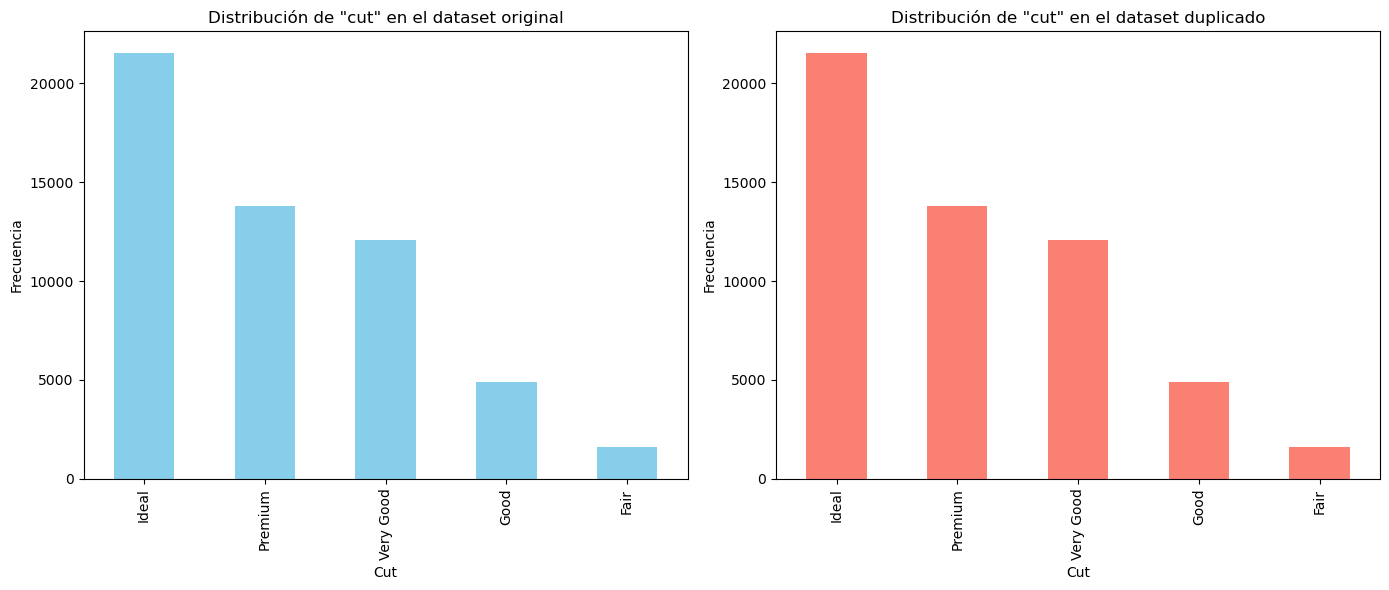

In [93]:

# Graficar el dataset original pyplot
pyplot.figure(figsize=(14, 6))

pyplot.subplot(1, 2, 1)
data['cut'].value_counts().plot(kind='bar', color='skyblue')
pyplot.title('Distribución de "cut" en el dataset original')
pyplot.xlabel('Cut')
pyplot.ylabel('Frecuencia')

# Graficar el dataset duplicado (sintético)
pyplot.subplot(1, 2, 2)
df_duplicate['cut'].value_counts().plot(kind='bar', color='salmon')
pyplot.title('Distribución de "cut" en el dataset duplicado')
pyplot.xlabel('Cut')
pyplot.ylabel('Frecuencia')

pyplot.tight_layout()
pyplot.show()


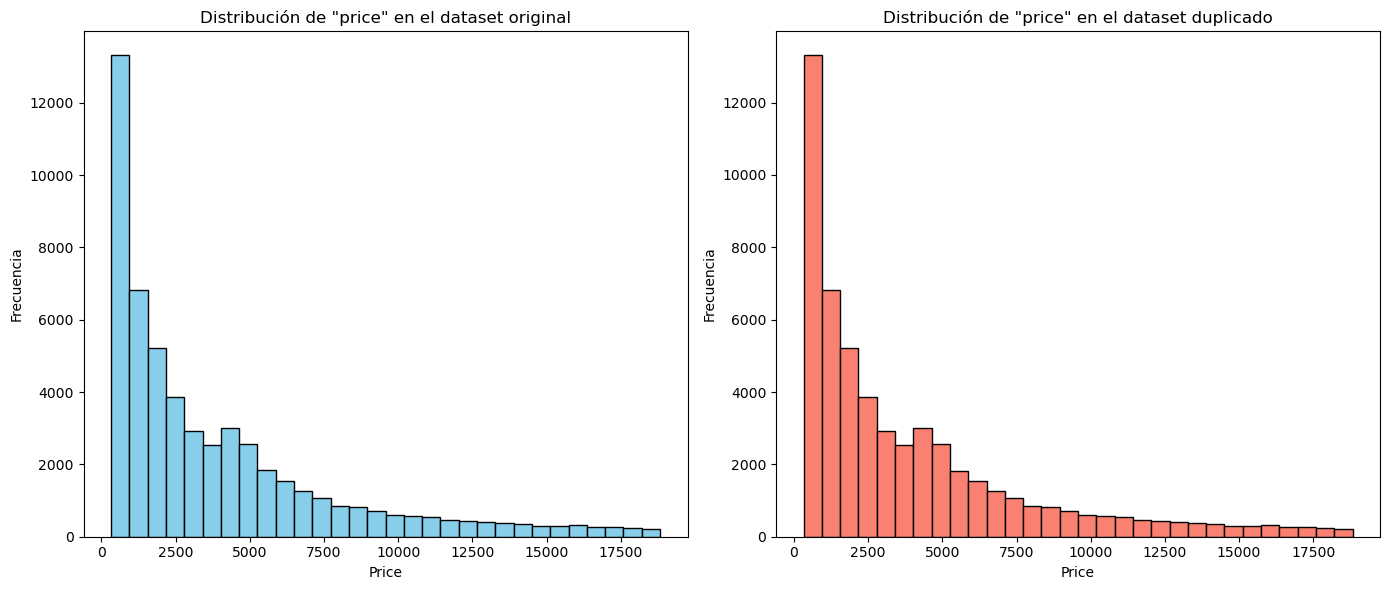

In [92]:
import matplotlib.pyplot as plt

# Graficar el dataset original
plt.figure(figsize=(14, 6))

# Subplot 1: Distribución de "price" en el dataset original
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')  # Usar histograma para agrupar precios
plt.title('Distribución de "price" en el dataset original')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Subplot 2: Distribución de "price" en el dataset duplicado
plt.subplot(1, 2, 2)
plt.hist(df_duplicate['price'], bins=30, color='salmon', edgecolor='black')  # Histograma también para el duplicado
plt.title('Distribución de "price" en el dataset duplicado')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Ajustar el layout para evitar solapamiento
plt.tight_layout()
plt.show()


In [94]:
# data.shape
X.shape[1]

13

In [95]:
input_layer_size  = 13   # Define el tamaño de la capa de entrada, es decir, la cantidad de características (columnas) de entrada para el modelo.
num_labels = 5           # Define el número de etiquetas o clases de salida, en este caso es un problema de clasificación con 5 clases.
m = y.size               # Almacena el número de ejemplos o instancias en el conjunto de datos. `y.size` devuelve el número total de elementos en la variable `y`, que normalmente es el número de filas.


Calcula y devuelve el resultado de la función sigmoide.
np.exp(-z): Calcula la exponencial del valor -z (e elevado a la potencia de -z). La función np.exp es de la librería numpy.
1.0 + np.exp(-z): Suma 1 al resultado de la exponencial.
1.0 / (1.0 + np.exp(-z)): Aplica la fórmula de la función sigmoide:

                                σ(0) = 1/1+e^0 = 1/2 = 0.5
                                
Esto devuelve un valor entre 0 y 1. La función sigmoide es utilizada para mapear cualquier valor real (de z) a un rango entre 0 y 1, lo cual es útil para probabilidades en problemas de clasificación.

In [96]:
def calcularSigmoide(z):
    # Calcula la sigmoide de z.

    return 1.0 / (1.0 + np.exp(-z)) #Es el valor que será transformado a través de la función sigmoide.

In [97]:
def calcularCosto(theta, X, y, lambda_):
    # Inicializa algunos valores útiles
    m = y.size  # 'm' es el número de ejemplos de entrenamiento (el tamaño del vector 'y')

    # Convierte las etiquetas a valores enteros si son booleanos
    if y.dtype == bool:
        y = y.astype(int)  # Si 'y' es un array de booleanos, lo convierte a enteros (True a 1 y False a 0)

    J = 0  # Inicializa la variable para almacenar el costo (J)
    grad = np.zeros(theta.shape)  # Inicializa un array de ceros del mismo tamaño que 'theta' para el gradiente

    # Calcula las predicciones del modelo utilizando la función sigmoide
    h = calcularSigmoide(X.dot(theta.T))  # 'h' es la hipótesis del modelo (predicciones). 
                                          # Se calcula como la sigmoide de la multiplicación matricial entre 'X' y 'theta'

    # Crea una copia de 'theta' y establece su primer valor en 0 para la regularización (no se regulariza el término de sesgo)
    temp = theta
    temp[0] = 0  # El primer término de 'theta' se refiere al sesgo, y no debe ser regularizado

    # Calcula la función de costo con regularización
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    # La primera parte de esta fórmula es el costo para regresión logística:
    # J = (1/m) * sum(-y*log(h) - (1-y)*log(1-h)) 
    # La segunda parte es el término de regularización:
    # (lambda_/(2*m)) * sum(theta^2), donde se excluye el primer término de 'theta' (que fue anulado en 'temp')

    # Calcula el gradiente sin regularización
    grad = (1 / m) * (h - y).dot(X)  # El gradiente es la derivada parcial del costo respecto a los parámetros theta

    # Se aplica regularización al gradiente (exceptuando el primer término de 'theta')
    grad = grad + (lambda_ / m) * temp  # Se añade el término de regularización al gradiente, excepto al término de sesgo

    # Devuelve el costo (J) y el gradiente (grad)
    return J, grad


In [98]:
# Valores de prueba para los parámetros theta
# Si ahora tienes 13 columnas de características (12 más el sesgo), entonces theta_t debe tener 13 elementos
theta_t = np.array([-2, -1, 1, 2, 1, 2, 1, -1, 0.5, -0.5, 2, -2, 1], dtype=float)

# Valores de prueba para las entradas
# Generamos 13 columnas: 1 columna de unos (para el sesgo) y 12 columnas de características
X_t = np.concatenate((np.ones((5, 1)), np.arange(1, 61).reshape(5, 12, order='F')/10.0), axis=1)

print(X_t)
# Ahora, X_t tendrá una matriz de tamaño 5x13 (5 filas y 13 columnas), donde la primera columna es de unos

# Valores de testeo para las etiquetas
# Si tienes 5 clases, las etiquetas podrían variar de 0 a 4 (si las representas con números)
y_t = np.array([0, 1, 2, 3, 4])  # Etiquetas para 5 clases

# Valores de testeo para el parámetro de regularización
lambda_t = 3


[[1.  0.1 0.6 1.1 1.6 2.1 2.6 3.1 3.6 4.1 4.6 5.1 5.6]
 [1.  0.2 0.7 1.2 1.7 2.2 2.7 3.2 3.7 4.2 4.7 5.2 5.7]
 [1.  0.3 0.8 1.3 1.8 2.3 2.8 3.3 3.8 4.3 4.8 5.3 5.8]
 [1.  0.4 0.9 1.4 1.9 2.4 2.9 3.4 3.9 4.4 4.9 5.4 5.9]
 [1.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6. ]]


In [102]:
J, grad = calcularCosto(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J)) #Imprime el valor del costo (J) con 6 decimales.
print('Costo esperadot: -7.999778')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [-1.000007, -1.548558, -0.400016, -0.300142]');

Costo         : -7.999998
Costo esperadot: -7.999778
-----------------------
Gradientes:
 [-1.000002, -1.100000, -0.400001, -0.300002]
Gradientes esperados:
 [-1.000007, -1.548558, -0.400016, -0.300142]


In [104]:
def oneVsAll(X, y, num_labels, lambda_):
    # X: Matriz de características (m x n)
    # y: Vector de etiquetas (m x 1)
    # num_labels: Número de etiquetas (número de clases)
    # lambda_: Parámetro de regularización

    m, n = X.shape  # Obtiene el número de ejemplos (m) y el número de características (n) en el dataset

    # Inicializa una matriz para almacenar los parámetros theta para cada clase
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega una columna de unos a la matriz X para el término de sesgo
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Itera sobre cada clase
    for c in np.arange(num_labels):
        # Inicializa los parámetros theta para la clase actual con ceros
        initial_theta = np.zeros(n + 1)

        # Define las opciones para el optimizador
        options = {'maxiter': 50}

        # Optimiza la función de costo para la clase actual
        res = optimize.minimize(
            calcularCosto,                 # Función objetivo a minimizar
            initial_theta,                 # Valores iniciales de theta
            (X, (y == (c + 1)), lambda_),  # Argumentos para la función de costo
            jac=True,                      # Usa el gradiente proporcionado por calcularCosto
            method='BFGS',                 # Método de optimización
            options=options                # Opciones para el optimizador
        )

        # Almacena los parámetros óptimos encontrados para la clase actual en all_theta
        all_theta[c] = res.x

    return all_theta


In [105]:
# Define el valor del parámetro de regularización
lambda_ = 0.1
# Entrena el clasificador usando el enfoque "one-vs-all"
# Llama a la función oneVsAll para obtener los parámetros theta para cada clase
all_theta = oneVsAll(X, y, num_labels, lambda_)

C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\241027379.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z)) #Es el valor que será transformado a través de la función sigmoide.
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1280596670.py:21: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1280596670.py:21: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\241027379.py:4: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z)) #Es el valor que será transformado a través de la función sigmoide.
C:\Users\Rose\AppData\Local\Temp\ipykernel_12988\1280596670.py:21: RuntimeWarning: divide by zero encounte

In [106]:
print(all_theta)

[[ 7.38179144e-01  6.69833351e-06 -5.22000226e-01  1.09224118e-02
   8.05325708e-02  4.03534194e-01 -4.05644979e-01  1.33965909e-05
   7.13284826e-02  4.46727373e-02  3.95602136e-03  2.09382382e-02
  -2.85277773e+00  1.44747522e-01]
 [-8.90332873e+00 -2.13288264e-06 -5.99196144e-01  1.46573215e-02
  -2.89581699e-02  4.47521668e-02  6.41119722e-02  4.34699013e-06
   1.59669631e-03  2.93368834e-02  2.34424878e-01  1.64346404e-02
   1.81344553e-01 -2.97599975e-02]
 [ 1.92256808e-01 -6.84638454e-07 -3.89613947e-01  7.42319233e-03
  -5.71725686e-02 -1.32831349e-01 -2.09412972e-03  4.86497918e-05
  -1.11793773e-01  6.50126970e-02 -1.70497489e-01  5.72569357e-02
   2.31461273e+00  1.59215520e-01]
 [-1.31007708e+00 -1.61400567e-06  4.08041395e-01 -2.87874717e-04
   1.84326607e-02  1.54383355e-02 -3.19693972e-02 -2.79220011e-05
  -8.35493234e-02  1.77400873e-02  1.08977540e-01 -4.33290660e-02
   2.56770683e-01 -6.52397125e-02]
 [-2.41022495e+00 -3.23116112e-06  3.84067687e-01 -2.12210840e-02
  

In [108]:
def predictOneVsAll(all_theta, X):
    m = X.shape[0]  # Obtiene el número de ejemplos (m) en el conjunto de datos X
    num_labels = all_theta.shape[0]  # Obtiene el número de clases (num_labels) desde all_theta

    p = np.zeros(m)  # Inicializa un vector de ceros para almacenar las predicciones

    # Añade una columna de unos a la matriz X para el término de sesgo
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Calcula las probabilidades para cada clase usando la función sigmoide
    # X.dot(all_theta.T) multiplica X por los parámetros theta transpuestos
    # calcularSigmoide aplica la función sigmoide a cada resultado
    # np.argmax encuentra el índice de la clase con la probabilidad más alta para cada ejemplo
    p = np.argmax(calcularSigmoide(X.dot(all_theta.T)), axis=1)

    # Las clases están etiquetadas de 1 a num_labels, por lo que se suma 1 al índice para obtener la clase final
    return p + 1


In [114]:
X_numpy = X.to_numpy()


In [121]:
import numpy as np

# Imprime las dimensiones del DataFrame X (convertido a un array NumPy)
print(X.shape)

# Realiza predicciones en el conjunto de entrenamiento usando el modelo entrenado
pred = predictOneVsAll(all_theta, X_numpy)

# Calcula y muestra la precisión del conjunto de entrenamiento
print('Precision del conjunto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))

# Selecciona un subconjunto de datos de prueba y sus etiquetas
XPrueba = X_numpy[128:141, :].copy()  # Usa NumPy array slicing para seleccionar las filas
yPrueba = y[128:141].copy()  # Selecciona las etiquetas correspondientes usando pandas slicing

# Imprime las dimensiones del subconjunto de prueba
print(XPrueba.shape)  # Imprime el tamaño de XPrueba (debería ser (13, 13) si hay 13 características)
print(len(XPrueba))  # Imprime el número de ejemplos en XPrueba

# Añade una columna de unos a XPrueba para el término de sesgo
# np.concatenate se usa para añadir una columna de unos al principio de XPrueba
# np.ones((13, 1)) crea una columna de unos de tamaño (13, 1) 
# XPrueba tiene (13, 13), entonces después de la concatenación tendrá (13, 14)
XPrueba = np.concatenate((np.ones((XPrueba.shape[0], 1)), XPrueba), axis=1)

# Imprime la matriz XPrueba después de añadir la columna de sesgo
print(XPrueba)  # XPrueba debería ahora tener una columna de unos al principio

# Realiza predicciones en el subconjunto de prueba usando el modelo entrenado
# calcularSigmoide aplica la función sigmoide a la multiplicación matricial entre XPrueba y all_theta.T
# np.argmax encuentra el índice de la clase con la mayor probabilidad para cada ejemplo
p = np.argmax(calcularSigmoide(XPrueba.dot(all_theta.T)), axis=1)

# Ajusta las predicciones de índice (basado en 0) a clases (basado en 1) y las imprime
print(p + 1)  # Añade 1 para que las clases vayan de 1 a 5 en lugar de 0 a 4


(72940, 13)
Precision del conjuto de entrenamiento: 66.98%
(13, 13)
13
[[1.000e+00 1.290e+02 9.100e-01 4.000e+00 3.000e+00 6.440e+01 5.700e+01
  2.763e+03 6.110e+00 6.090e+00 3.930e+00 4.000e+00 5.000e+00 1.000e+00]
 [1.000e+00 1.300e+02 9.100e-01 4.000e+00 3.000e+00 6.570e+01 6.000e+01
  2.763e+03 6.030e+00 5.990e+00 3.950e+00 4.000e+00 5.000e+00 1.000e+00]
 [1.000e+00 1.310e+02 7.700e-01 4.000e+00 2.000e+00 6.200e+01 5.600e+01
  2.763e+03 5.890e+00 5.860e+00 3.640e+00 4.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 1.320e+02 7.100e-01 5.000e+00 1.000e+00 6.360e+01 5.800e+01
  2.764e+03 5.640e+00 5.680e+00 3.600e+00 4.000e+00 4.000e+00 1.000e+00]
 [1.000e+00 1.330e+02 7.100e-01 5.000e+00 1.000e+00 6.190e+01 5.900e+01
  2.764e+03 5.690e+00 5.720e+00 3.530e+00 4.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 1.340e+02 7.000e-01 2.000e+00 2.000e+00 6.260e+01 6.000e+01
  2.765e+03 5.620e+00 5.650e+00 3.530e+00 4.000e+00 4.000e+00 1.000e+00]
 [1.000e+00 1.350e+02 7.700e-01 4.000e+00 4.000e+00 6.130e+